In [1]:
!nvidia-smi

Mon Mar  6 03:33:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ruYkBI4pyctKj3DvsDMf")
project = rf.workspace("indian-institute-of-technology-kharagpur-672s0").project("crop-and-weed-detection-and-classification-using-computer-vision-and-deep-learning-models")
dataset = project.version(3).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9887d454b6803ef58af9c216d5ae0e7507bd724570da699c83fa29043e2acd91
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learning-models-3 in yolov8:: 100%|██████████| 3012/3012 [00:03<00:00, 802.85it/s] 


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml  epochs=10 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 13.5MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learning-models-3/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=Fal

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1678073870.8b531c07f158.1907.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


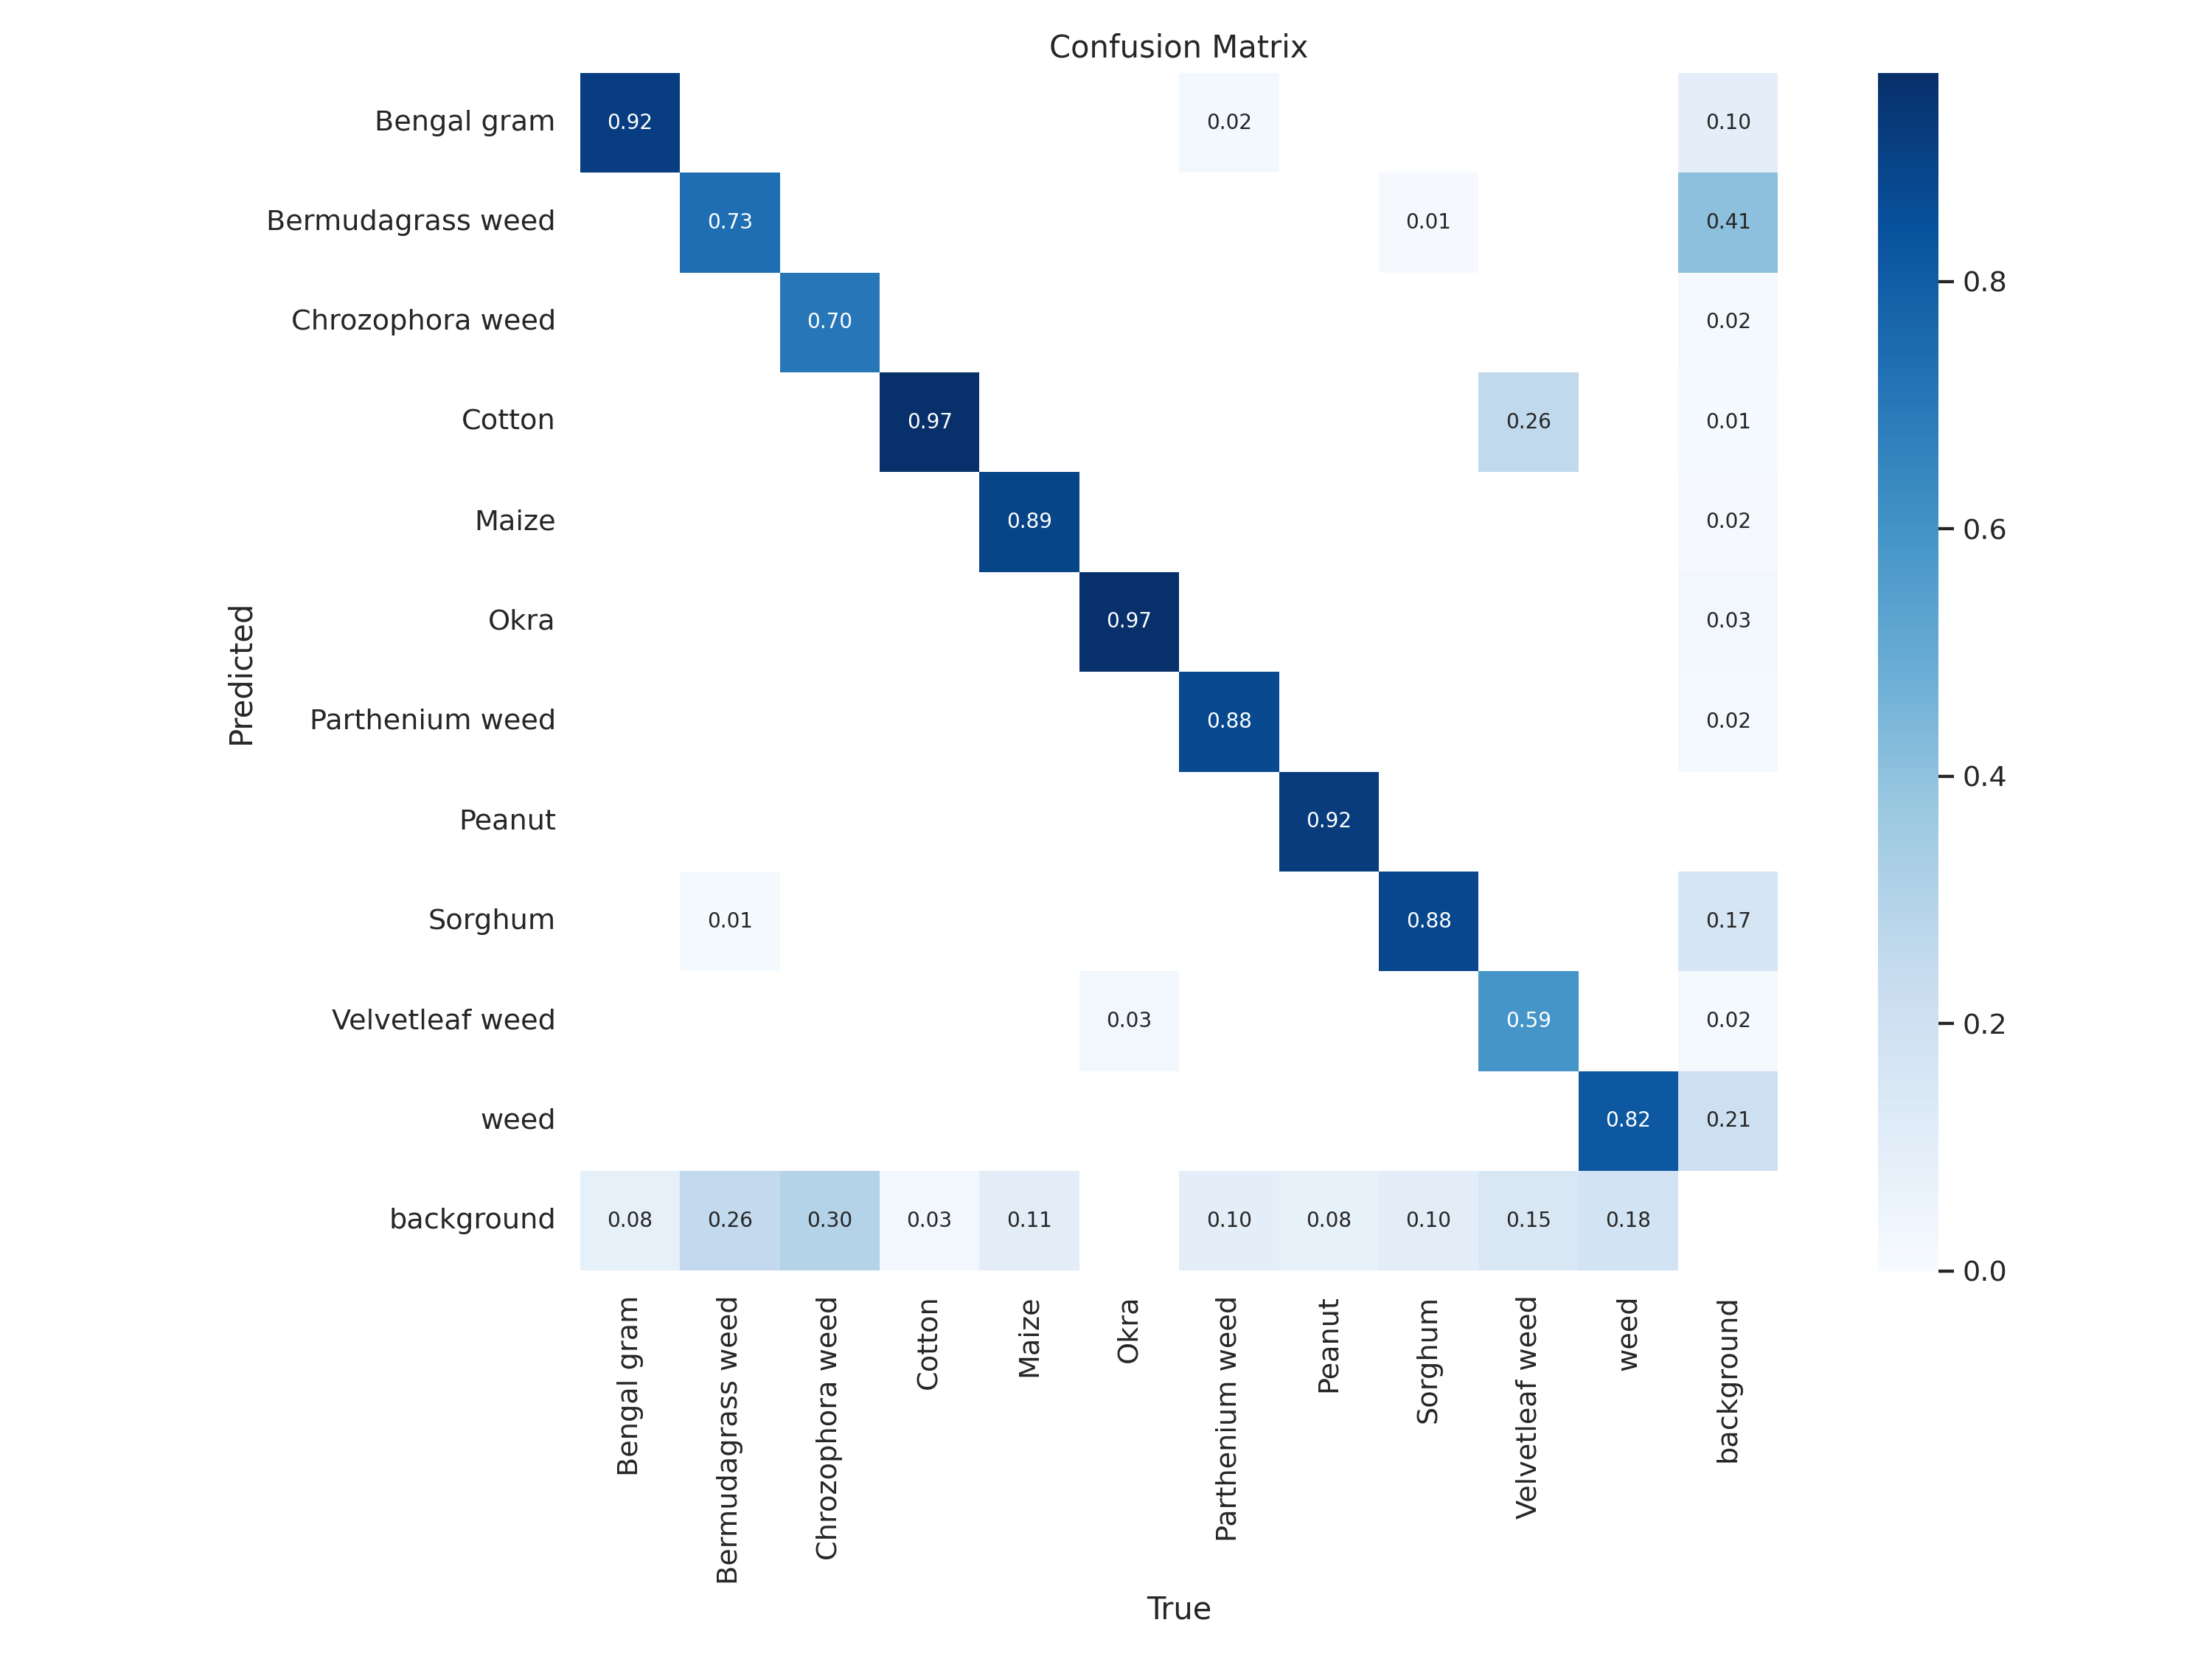

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


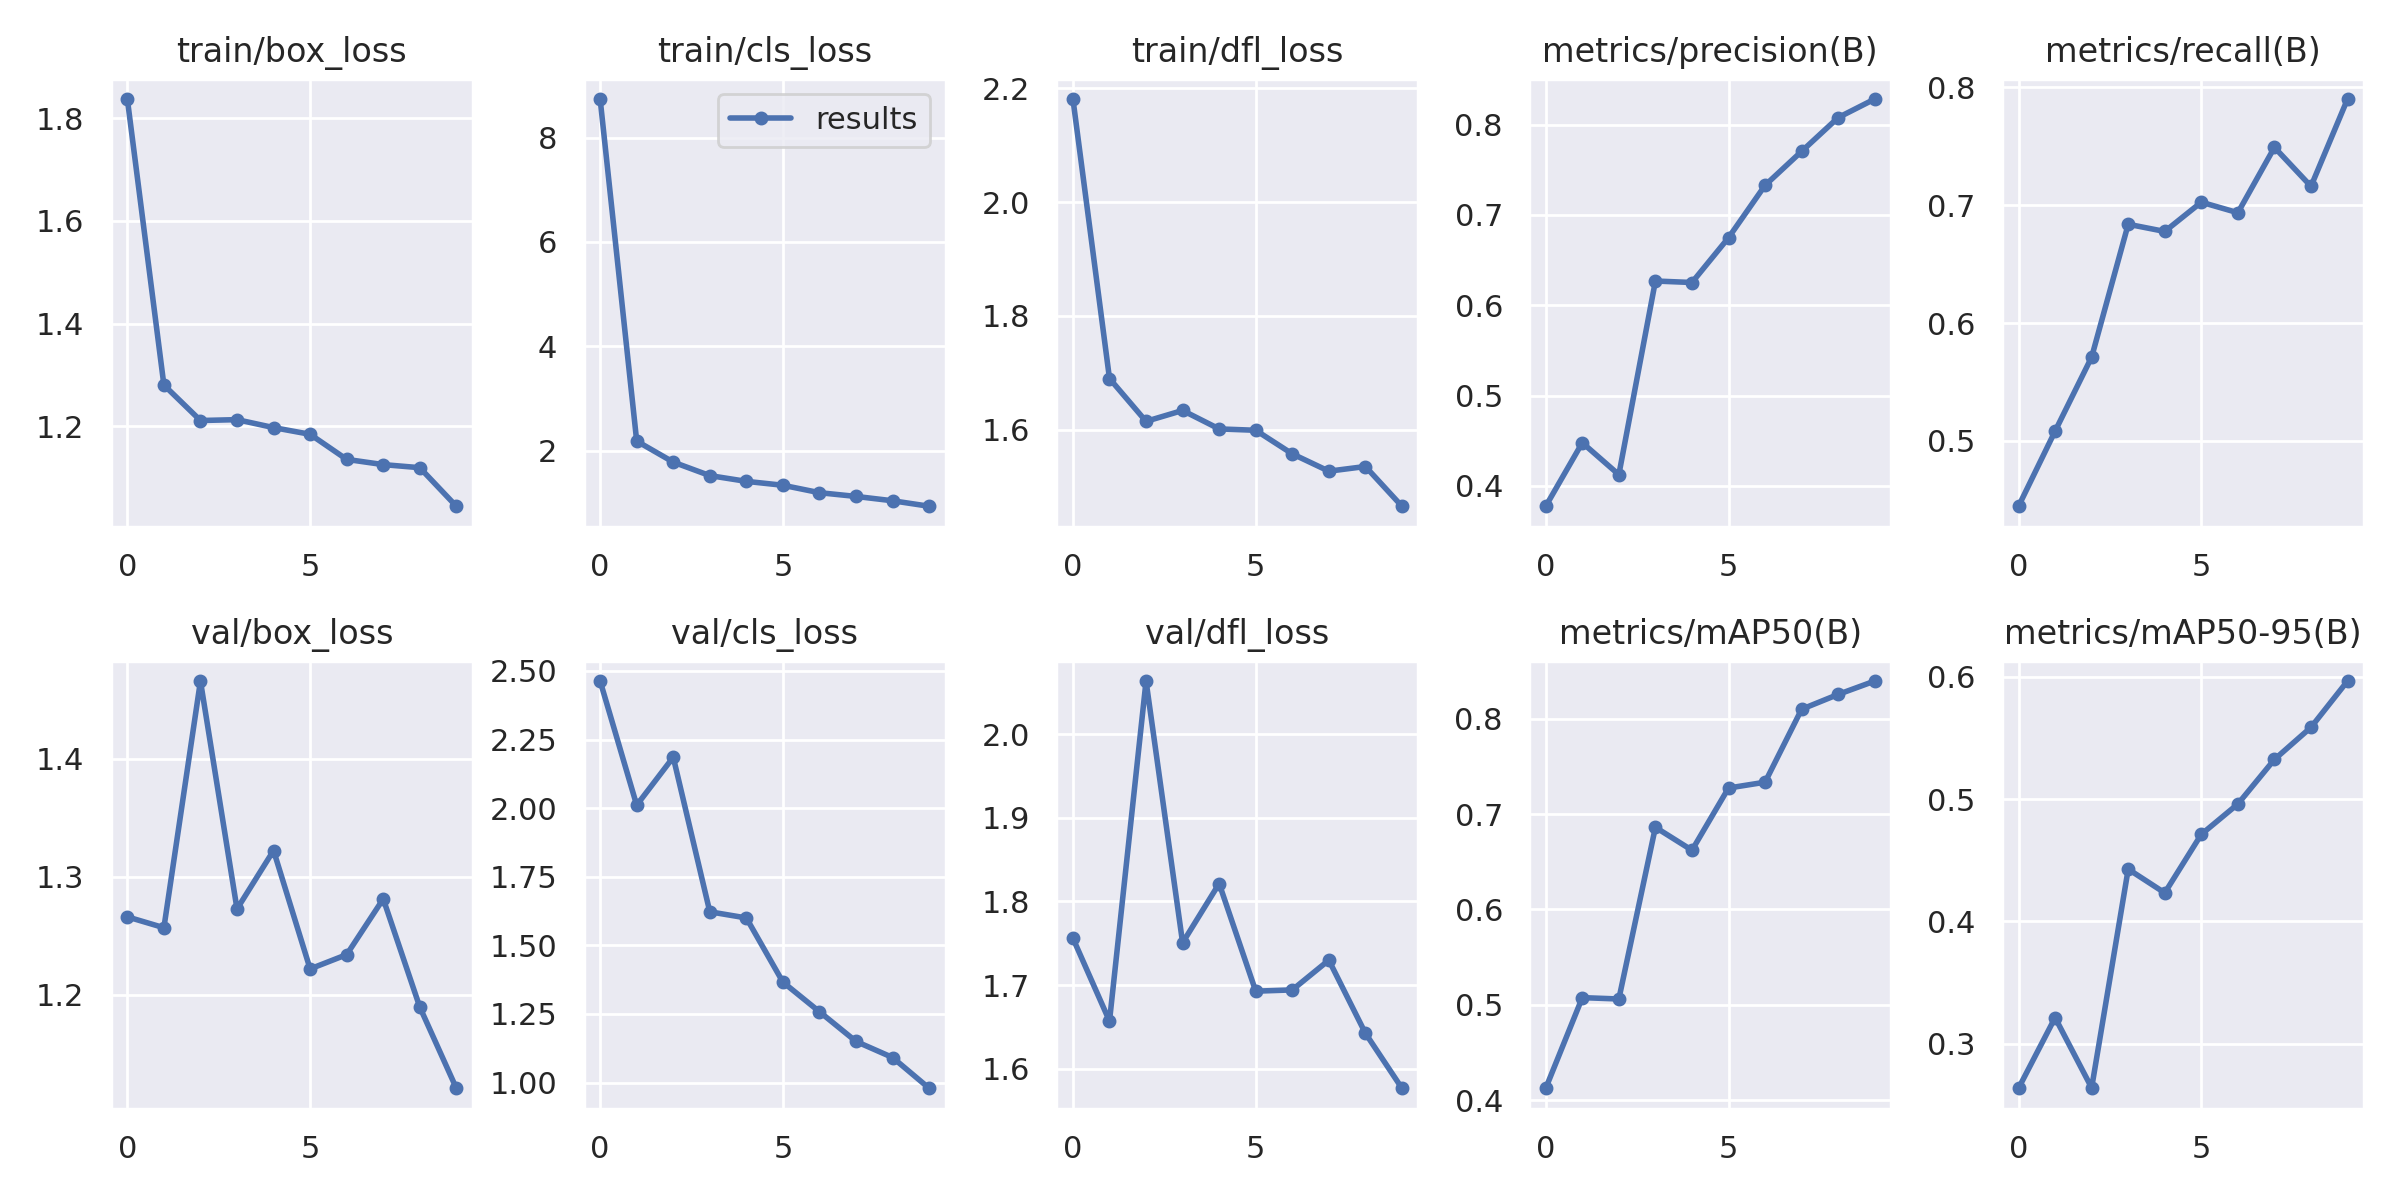

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


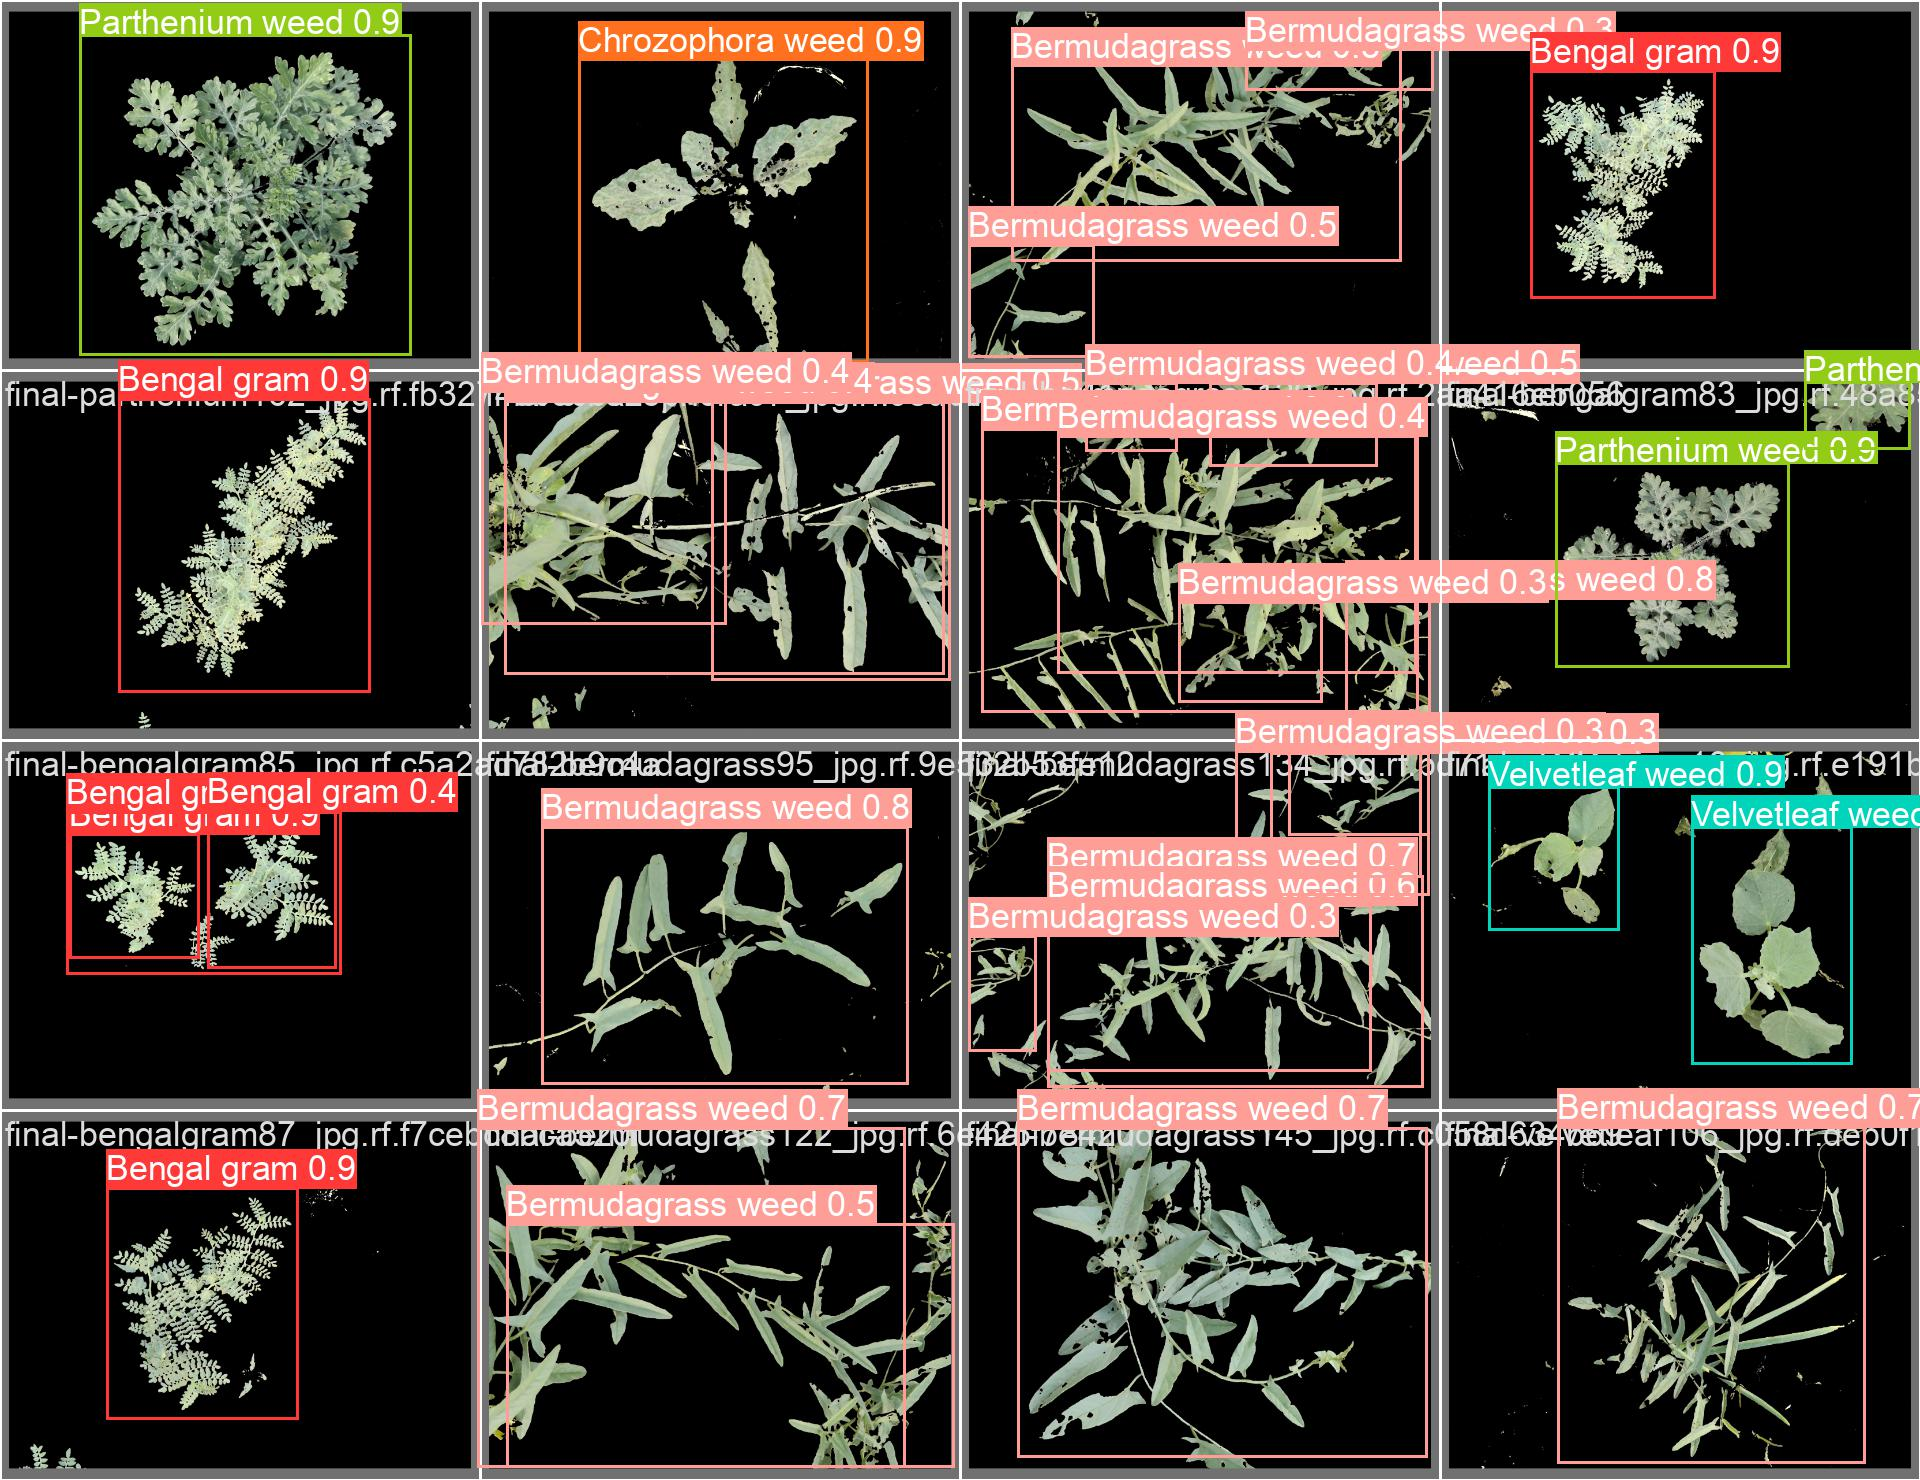

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learning-models-3/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100% 299/299 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 576, len(boxes) = 589. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:39<00:00,  2.09s/it]
                   all        299        589      0.828       0.79      0.842      0.599
           Bengal gram        299         83      0.777      0.892      0.874      0.664
     Bermudagrass weed        299

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on final-maize39_jpg.rf.a6fb60e89a62468c4743300593ab9fb2.jpg


{'predictions': [{'x': 63.5,
   'y': 407.5,
   'width': 95.0,
   'height': 111.0,
   'confidence': 0.6848662495613098,
   'class': 'weed',
   'image_path': '/content/datasets/Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learning-models-3/test/images/final-maize39_jpg.rf.a6fb60e89a62468c4743300593ab9fb2.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 218.0,
   'y': 249.5,
   'width': 196.0,
   'height': 425.0,
   'confidence': 0.6798990368843079,
   'class': 'Maize',
   'image_path': '/content/datasets/Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learning-models-3/test/images/final-maize39_jpg.rf.a6fb60e89a62468c4743300593ab9fb2.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 481.5,
   'y': 234.5,
   'width': 57.0,
   'height': 51.0,
   'confidence': 0.644599199295044,
   'class': 'weed',
   'image_path': '/content/datasets/Crop-and-Weed-detection-and-classification-using-computer-vision-and-deep-learnin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
